In [219]:
import pandas as pd 
import glob

In [220]:
path = "/Users/sarthaktyagi/Desktop/30days-3oprojects/car_price_prediction/data/carSpecs"

all_files = glob.glob(path + "/*.csv")

In [221]:
all_files

['/Users/sarthaktyagi/Desktop/30days-3oprojects/car_price_prediction/data/carSpecs/car_data.csv',
 '/Users/sarthaktyagi/Desktop/30days-3oprojects/car_price_prediction/data/carSpecs/car_data2.csv',
 '/Users/sarthaktyagi/Desktop/30days-3oprojects/car_price_prediction/data/carSpecs/car_data3.csv',
 '/Users/sarthaktyagi/Desktop/30days-3oprojects/car_price_prediction/data/carSpecs/car_data4.csv']

In [281]:
newData = pd.concat((pd.read_csv(files) for files in all_files),ignore_index = True)

In [282]:
newData.shape

(1206, 8)

In [283]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YOM           1206 non-null   int64 
 1   Company       1206 non-null   object
 2   Model         1206 non-null   object
 3   Odometer      1206 non-null   object
 4   Fuel          1206 non-null   object
 5   Transmission  1206 non-null   object
 6   RTO           1206 non-null   object
 7   Price         1206 non-null   object
dtypes: int64(1), object(7)
memory usage: 75.5+ KB


In [286]:
newData.head()


,YOM,Company,Model,Odometer,Fuel,Transmission,RTO,Price
0,2018,Mahindra,Scorpio,48.71k km,Diesel,Manual,DL-8C,₹9.49 lakh
1,2024,Tata,Harrier,7.83k km,Diesel,Manual,DL-3C,₹15.65 lakh
2,2022,Mahindra,XUV300,57.98k km,Diesel,Manual,HR-26,₹8.48 lakh
3,2021,Tata,Harrier,89.58k km,Diesel,Manual,HR-20,₹9.99 lakh
4,2022,Mahindra,Bolero,36.60k km,Diesel,Manual,DL-8C,₹7.63 lakh


In [287]:
newData

,YOM,Company,Model,Odometer,Fuel,Transmission,RTO,Price
0,2018,Mahindra,Scorpio,48.71k km,Diesel,Manual,DL-8C,₹9.49 lakh
1,2024,Tata,Harrier,7.83k km,Diesel,Manual,DL-3C,₹15.65 lakh
2,2022,Mahindra,XUV300,57.98k km,Diesel,Manual,HR-26,₹8.48 lakh
3,2021,Tata,Harrier,89.58k km,Diesel,Manual,HR-20,₹9.99 lakh
4,2022,Mahindra,Bolero,36.60k km,Diesel,Manual,DL-8C,₹7.63 lakh
...,...,...,...,...,...,...,...,...
1201,2016,Hyundai,Grand i10,30.93k km,Petrol,Manual,DL-12,₹3.78 lakh
1202,2014,Hyundai,Grand i10,50.14k km,Petrol,Manual,DL-7C,₹2.36 lakh
1203,2016,Hyundai,Creta,36.57k km,Petrol,Manual,DL-3C,₹6.25 lakh
1204,2019,Maruti,Swift,27.72k km,Petrol,Manual,DL-4C,₹4.66 lakh


- doing label encoding for the tree based model
- and for other --> OHE

In [288]:
columns = ['Company', 'Model', 'odometer', 'fuel', 'transmission', 'RTO']

In [289]:
newData.Model.value_counts()

Model
Grand i10         50
NEXON             49
Creta             48
Kwid              46
City              43
                  ..
Benz GLC CLASS     1
Q5                 1
Q7                 1
Benz GL Class      1
ELEVATE            1
Name: count, Length: 133, dtype: int64

In [290]:
import re 
def odoConverter(text):
    match = re.match(r"([\d.]+)([a-zA-Z])",text)
    if match :
        number = float(match.group(1))
        unit = match.group(2)

    if unit.lower == "k":
        return nummber * 1000
    else:
        return number * 100000




In [291]:
df =newData

In [292]:
df['Odometer'] = df['Odometer'].apply(odoConverter)

### problem i enconter
- if i create OHE for model it will create sparsity in the data as the column have 141 unique values 
- same4 goes with the company column 
- odometer have string value like 23.32k km so i have to convert it into numerical
- fuel --> OHE
- transmission --> OHE
- RTO can be written as states or and then OHE can be done on that columns

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1206 entries, 0 to 1205
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YOM           1206 non-null   int64  
 1   Company       1206 non-null   object 
 2   Model         1206 non-null   object 
 3   Odometer      1206 non-null   float64
 4   Fuel          1206 non-null   object 
 5   Transmission  1206 non-null   object 
 6   RTO           1206 non-null   object 
 7   Price         1206 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 75.5+ KB


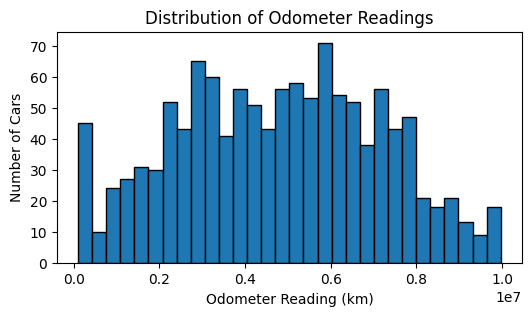

In [234]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.hist(df['Odometer'], bins=30, edgecolor='black')
plt.xlabel("Odometer Reading (km)")
plt.ylabel("Number of Cars")
plt.title("Distribution of Odometer Readings")
plt.show()

- kinda normal distribution 

In [294]:
import re 
def state_extractor(text):
    match = re.match(r"^[A-Z]+",text)
    state = match.group()
    if state:
        return state
    else:
        return None 

df['State'] = df['RTO'].apply(state_extractor)


In [295]:
df.State.value_counts()

State
DL    679
HR    354
UP    157
HP      5
MH      4
PY      3
MP      1
CH      1
KA      1
JH      1
Name: count, dtype: int64

In [296]:
df.State.nunique()

10

In [297]:
state_name = [ 'PY', 'MH', 'HP', 'KA', 'JH', 'CG', 'BR', 'MP',
       'CH', 'GJ', 'PB']
def helper(text):
    if text in state_name:
        return "OTH"
    else:
        return text

df['State']= df['State'].apply(helper)

In [298]:
df.head(4)

,YOM,Company,Model,Odometer,Fuel,Transmission,RTO,Price,State
0,2018,Mahindra,Scorpio,4871000.0,Diesel,Manual,DL-8C,₹9.49 lakh,DL
1,2024,Tata,Harrier,783000.0,Diesel,Manual,DL-3C,₹15.65 lakh,DL
2,2022,Mahindra,XUV300,5798000.0,Diesel,Manual,HR-26,₹8.48 lakh,HR
3,2021,Tata,Harrier,8958000.0,Diesel,Manual,HR-20,₹9.99 lakh,HR


In [299]:
def agefinder(YearOfManu):
    age= 2025 - YearOfManu
    return age


In [300]:
df['carAge'] = df['YOM'].apply(agefinder)

In [301]:
df.head()

,YOM,Company,Model,Odometer,Fuel,Transmission,RTO,Price,State,carAge
0,2018,Mahindra,Scorpio,4871000.0,Diesel,Manual,DL-8C,₹9.49 lakh,DL,7
1,2024,Tata,Harrier,783000.0,Diesel,Manual,DL-3C,₹15.65 lakh,DL,1
2,2022,Mahindra,XUV300,5798000.0,Diesel,Manual,HR-26,₹8.48 lakh,HR,3
3,2021,Tata,Harrier,8958000.0,Diesel,Manual,HR-20,₹9.99 lakh,HR,4
4,2022,Mahindra,Bolero,3660000.0,Diesel,Manual,DL-8C,₹7.63 lakh,DL,3


In [302]:
newData.drop(columns =['RTO', 'YOM'],inplace = True)
newData.head(4)

,Company,Model,Odometer,Fuel,Transmission,Price,State,carAge
0,Mahindra,Scorpio,4871000.0,Diesel,Manual,₹9.49 lakh,DL,7
1,Tata,Harrier,783000.0,Diesel,Manual,₹15.65 lakh,DL,1
2,Mahindra,XUV300,5798000.0,Diesel,Manual,₹8.48 lakh,HR,3
3,Tata,Harrier,8958000.0,Diesel,Manual,₹9.99 lakh,HR,4


In [303]:
df.Company.value_counts()

Company
Maruti        286
Hyundai       234
Tata          150
Honda         111
Renault        82
KIA            49
Mahindra       48
Toyota         44
MG             41
Volkswagen     29
Ford           22
Nissan         22
Jeep           20
Skoda          20
Mercedes       14
Datsun         10
BMW             7
Landrover       5
Audi            3
ISUZU           2
Volvo           2
Mini            2
Jaguar          2
Chevrolet       1
Name: count, dtype: int64

In [304]:
counts = df['Company'].value_counts()
rare = counts[counts < 10].index
df['Company'] = df['Company'].replace(rare, 'Other')

In [305]:
df.Model.nunique()

133

In [306]:
df.Model.value_counts()

Model
Grand i10         50
NEXON             49
Creta             48
Kwid              46
City              43
                  ..
Benz GLC CLASS     1
Q5                 1
Q7                 1
Benz GL Class      1
ELEVATE            1
Name: count, Length: 133, dtype: int64

In [307]:
newData.head(10)

,Company,Model,Odometer,Fuel,Transmission,Price,State,carAge
0,Mahindra,Scorpio,4871000.0,Diesel,Manual,₹9.49 lakh,DL,7
1,Tata,Harrier,783000.0,Diesel,Manual,₹15.65 lakh,DL,1
2,Mahindra,XUV300,5798000.0,Diesel,Manual,₹8.48 lakh,HR,3
3,Tata,Harrier,8958000.0,Diesel,Manual,₹9.99 lakh,HR,4
4,Mahindra,Bolero,3660000.0,Diesel,Manual,₹7.63 lakh,DL,3
5,Mahindra,Thar,5290000.0,Diesel,Auto,₹11.20 lakh,DL,4
6,Tata,Safari,2372000.0,Diesel,Manual,₹14.10 lakh,HR,3
7,Mahindra,XUV300,7536000.0,Diesel,Manual,₹7.90 lakh,DL,3
8,KIA,CARENS,4711000.0,Diesel,Manual,₹10.49 lakh,DL,3
9,Tata,Safari,8771000.0,Diesel,Auto,₹12.20 lakh,DL,4


In [308]:
def extract_price(text):
    match = re.search(r"(\d+(\.\d+)?)\s*(lakh|lakhs)", text, flags=re.IGNORECASE)
    if match:
        number = match.group(1)
        unit = match.group(3)
        return float(number)
    else:
        return None

df['Price']= df['Price'].apply(extract_price)

In [309]:
df.head(4)

,Company,Model,Odometer,Fuel,Transmission,Price,State,carAge
0,Mahindra,Scorpio,4871000.0,Diesel,Manual,9.49,DL,7
1,Tata,Harrier,783000.0,Diesel,Manual,15.65,DL,1
2,Mahindra,XUV300,5798000.0,Diesel,Manual,8.48,HR,3
3,Tata,Harrier,8958000.0,Diesel,Manual,9.99,HR,4


In [316]:
df.Model.unique()

array(['Scorpio', 'Harrier', 'XUV300', 'Bolero', 'Thar', 'Safari',
       'CARENS', 'X3', 'XC 60', 'S60', 'Benz E Class', 'DISCOVERY SPORT',
       'A3', 'Benz CLS Class', 'Benz GLC COUPE', 'Fortuner', 'NEXON',
       'SONET', 'Duster', 'Compass', 'VENUE', 'Vitara Brezza', 'XUV500',
       'XUV700', 'ALTROZ', 'HECTOR PLUS', 'SELTOS', 'Creta', 'Rapid',
       'CRV', 'MERIDIAN', 'Verna', 'Tucson', 'MU-X', 'CARNIVAL',
       'D-Max V Cross', 'Benz GLC CLASS', 'Q5', 'SCORPIO-N', 'Q7',
       'Dzire', 'Benz GL Class', 'Celerio', 'BREZZA', 'GRAND I10 NIOS',
       'Baleno', 'MAGNITE', 'FRONX', 'Alto', 'HECTOR', 'New Figo',
       'Tiago', 'Kwid', 'Alto 800', 'Swift', 'Ertiga', 'TAIGUN',
       'Redi Go', 'Wagon R 1.0', 'TIGOR', 'NEW SANTRO', 'Kicks', 'VIRTUS',
       'TRIBER', 'City', 'New Wagon-R', 'Elite i20', 'Ciaz', 'ASTOR',
       'KUSHAQ', 'Grand i10', 'Polo', 'AURA', 'Alto K10', 'Innova Crysta',
       'i10', 'i20 Active', 'IGNIS', 'Eon', 'Swift Dzire', 'Kiger',
       'Amaze', 'WR-V'

In [254]:
model_mean = df.groupby('Model')['Price'].mean()
df['Model_Enc'] = df['Model'].map(model_mean)

In [311]:
import pickle

# Suppose this is your dict
model_mean = df.groupby('Model')['Price'].mean().to_dict()

# Save it
with open("model_mean.pkl", "wb") as f:
    pickle.dump(model_mean, f)


In [255]:
df[df['Model']=="Thar"]

,Company,Model,Odometer,Fuel,Transmission,Price,State,carAge,Model_Enc
5,Mahindra,Thar,5290000.0,Diesel,Auto,11.20,DL,4,11.555833
100,Mahindra,Thar,921000.0,Petrol,Manual,10.80,DL,3,11.555833
102,Mahindra,Thar,2050000.0,Petrol,Auto,9.50,DL,5,11.555833
322,Mahindra,Thar,6122000.0,Petrol,Auto,10.01,HR,4,11.555833
358,Mahindra,Thar,1688000.0,Petrol,Auto,13.25,HR,3,11.555833
404,Mahindra,Thar,3669000.0,Petrol,Auto,13.70,DL,1,11.555833
481,Mahindra,Thar,921000.0,Petrol,Manual,10.80,DL,3,11.555833
483,Mahindra,Thar,2050000.0,Petrol,Auto,9.50,DL,5,11.555833
703,Mahindra,Thar,6122000.0,Petrol,Auto,10.01,HR,4,11.555833
739,Mahindra,Thar,1688000.0,Petrol,Auto,13.25,HR,3,11.555833


In [256]:
df.drop(columns = ['Model'],inplace =True)

In [269]:
df.sample(5)

,Company,Odometer,Fuel,Transmission,Price,State,carAge,Model_Enc
1107,Honda,140000.0,Petrol,Auto,2.26,HR,13,5.543721
104,Maruti,7129000.0,Petrol,Manual,8.27,DL,4,6.608750
459,Hyundai,6404000.0,CNG,Manual,5.12,UP,4,4.867500
984,Renault,3022000.0,Petrol,Manual,3.87,DL,5,4.331875
735,Skoda,9774000.0,Petrol,Manual,5.43,HR,6,5.052857


In [272]:
from sklearn.model_selection import train_test_split
X= df.drop(columns=['Price'])
y= df.Price

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(904, 7)
(302, 7)
(904,)
(302,)


In [258]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [259]:
from sklearn.preprocessing import OneHotEncoder

In [275]:
categorical_col = []
numerical_col=[]
for col in df.columns:
    if df[col].dtype =='object':
        categorical_col.append(col)
    else:
        numerical_col.append(col)

print(categorical_col)
print(numerical_col)
num_col=['Odometer', 'carAge', 'Model_Enc']

['Company', 'Fuel', 'Transmission', 'State']
['Odometer', 'Price', 'carAge', 'Model_Enc']


In [264]:
!pip install catboost


  Using cached catboost-1.2.8-cp310-cp310-macosx_11_0_universal2.whl.metadata (1.4 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-6.3.0-py3-none-any.whl.metadata (8.5 kB)
Using cached catboost-1.2.8-cp310-cp310-macosx_11_0_universal2.whl (27.8 MB)
Using cached graphviz-0.21-py3-none-any.whl (47 kB)
Using cached plotly-6.3.0-py3-none-any.whl (9.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [catboost]2/3 [catboost]


In [265]:
import joblib
model= joblib.load('/Users/sarthaktyagi/Desktop/30days-3oprojects/car_price_prediction/notebooks/best_model.pkl')

In [276]:
preprocessing = ColumnTransformer(
    transformers =[
        ("cat",OneHotEncoder(drop='first',sparse_output=False),categorical_col),
        ("num","passthrough",num_col)
    ]
)


In [277]:
pipe = Pipeline(
    steps =[
        ("preprocessor",preprocessing),
        ("model",model)
    ]
)

In [278]:
pipe.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [279]:
with open("car_price_pipeline.pkl", "wb") as f:
    pickle.dump(pipe, f)

In [195]:
df_ohe.sample(5)

,Odometer,Price,carAge,Model_Enc,Company_Ford,Company_Honda,Company_Hyundai,Company_Jeep,Company_KIA,Company_MG,...,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Fuel_Diesel,Fuel_Petrol,Transmission_Manual,State_HR,State_OTH,State_UP
195,6182000.0,6.12,9,7.078125,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
794,2105000.0,7.40,3,6.752941,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
938,7625000.0,4.64,10,5.543721,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
228,8091000.0,3.99,10,4.105937,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
111,4624000.0,4.06,6,4.007143,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [196]:
df_ohe.to_csv('/Users/sarthaktyagi/Desktop/30days-3oprojects/car_price_prediction/data/carSpecs/dataForTreebasedAlgo.csv',index =False)

In [199]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data=scaler.fit_transform(df_ohe)
df_scaled = pd.DataFrame(scaled_data, columns=df_ohe.columns)

In [200]:
df_scaled.to_csv('/Users/sarthaktyagi/Desktop/30days-3oprojects/car_price_prediction/data/carSpecs/dataForScaleSensiModel.csv',index =False)

In [205]:
newData.Transmission.value_counts()

Transmission
Manual    913
Auto      293
Name: count, dtype: int64

In [208]:
import pickle

# 1. Save

# 2. Save the model_mean dictionary
model_mean = df.groupby("best_model")["Price"].mean().to_dict()
with open("model_mean.pkl", "wb") as f:
    pickle.dump(model_mean, f)

# 3. Save the final feature column names
feature_columns = list(df.drop(columns=["Price"]).columns)
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)


KeyError: 'best_model'

In [318]:
df.Company.unique()

array(['Mahindra', 'Tata', 'KIA', 'Other', 'Mercedes', 'Toyota',
       'Renault', 'Jeep', 'Hyundai', 'Maruti', 'MG', 'Skoda', 'Honda',
       'Nissan', 'Ford', 'Volkswagen', 'Datsun'], dtype=object)

In [336]:
df[df['Company']=='Datsun'].Model.unique()

array(['Redi Go', 'Go'], dtype=object)